In [1]:
"""
This code makes diagnostic plots for raw and postprocessed WRF-Solar output
Postprocessing using the Kalman Filter is from Rafael Alvarenga's code (rafael.alvarenga@etu.univ-guyane.fr)
"""
from file_func import *
from plotting import *


In [2]:
li = pd.DataFrame()
method= 'KF'
nb_historical_days = nbhd
for ens in ['ens0','ens1','ens2','ens3','ensmean']:
    for domain in ['d01', 'd02']:
        dir_path_recursive = f'{main_dir_path_recursive}/{ens}/{domain}/{station_name}/{nb_historical_days}_day_{method}'
        all_files = glob.glob(dir_path_recursive + "/*_df.csv")

        for filename in all_files:
            df = pd.read_csv(filename)
            df['rmse_mod'] = fitting(df)[7]
            df['r_mod'] = fitting(df)[0]
            
            df['kfp_rmse'] = fitting_pred(df)[7]
            df['kfp_r'] = fitting_pred(df)[0]
            
            df['kf_rmse'] = kf_fitting_pred(df)[7]
            df['kf_r'] = kf_fitting_pred(df)[0]
   
            li = li.append(df)
            print(filename)


output_janmar/ens0/d01/MO/42_day_KF/ens0_d01_42_day_KF_df.csv
output_janmar/ens0/d02/MO/42_day_KF/ens0_d02_42_day_KF_df.csv
output_janmar/ens1/d01/MO/42_day_KF/ens1_d01_42_day_KF_df.csv
output_janmar/ens1/d02/MO/42_day_KF/ens1_d02_42_day_KF_df.csv
output_janmar/ens2/d01/MO/42_day_KF/ens2_d01_42_day_KF_df.csv
output_janmar/ens2/d02/MO/42_day_KF/ens2_d02_42_day_KF_df.csv
output_janmar/ens3/d01/MO/42_day_KF/ens3_d01_42_day_KF_df.csv
output_janmar/ens3/d02/MO/42_day_KF/ens3_d02_42_day_KF_df.csv
output_janmar/ensmean/d01/MO/42_day_KF/ensmean_d01_42_day_KF_df.csv
output_janmar/ensmean/d02/MO/42_day_KF/ensmean_d02_42_day_KF_df.csv


In [4]:
######################################
for ens in ['ens0','ens1','ens2','ens3','ensmean']:
    for domain in ['d02']:
        ########################
        df_togr = pd.DataFrame()
        ########################
        def mae_clear(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['ghi_clear'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            mae = mean_absolute_error(xaa,yaa)
            return (mae)


        def mae_mod(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['ghi_mod'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            mae = mean_absolute_error(xaa,yaa)
            return (mae)

        def mae_kfm(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['GHI_pred_kf_only'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            mae = mean_absolute_error(xaa,yaa)
            return (mae)
        ########################################
        if domain == 'd01':
            res = 5
        elif domain == 'd02':
            res = 1
        #########################################
        a = prep_input()[0]
        mod_ = prep_input()[1]

        df_clear = prep_opt(mod_, a, ens, domain)[0]

        df_clear = df_clear[['Time', 'ghi_clear']]
        r_input = li[['Time', 'HH','sza', 'ghi_obs', 'ghi_mod', 'GHI_pred_kf_only', 'GHI_pred_improved_fin', 'ens', 'domain', 'flag_clear']]
        #####################################################################
        x = r_input[(r_input['ens'] == ens) & (r_input['domain'] == domain)]
        x['Time'] = pd.to_datetime(x['Time']).dt.tz_convert(tz)
        df_togr = x.merge(df_clear,how='inner',on="Time")
        df_togr.to_csv(f'{ens}_{domain}_values.csv')
        df_togr = df_togr[df_togr['ghi_obs'] > 0]
        df_togr = df_togr[df_togr['ghi_mod'] > 0]
        mae_clear = df_togr.groupby('HH').apply(mae_clear).reset_index()
        mae_clear.columns = ['HH','mae_clear']
        mae_mod = df_togr.groupby('HH').apply(mae_mod).reset_index()
        mae_mod.columns = ['HH','mae_mod']
        mae_kf = df_togr.groupby('HH').apply(mae_kfm).reset_index()
        mae_kf.columns = ['HH','mae_kf']

        grby = mae_mod.merge(mae_clear,how='inner',on="HH")
        grby = grby.merge(mae_kf,how='inner',on="HH")
        grby.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_mae_imprv.csv')
        print(f'{main_dir_path_recursive}/{ens}_{domain}_mae_imprv.csv')
        

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_2433/2162663456.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Time'] = pd.to_datetime(x['Time']).dt.tz_convert(tz)


output_junaug/ens0_d02_mae_imprv.csv


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_2433/2162663456.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Time'] = pd.to_datetime(x['Time']).dt.tz_convert(tz)


output_junaug/ens1_d02_mae_imprv.csv


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_2433/2162663456.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Time'] = pd.to_datetime(x['Time']).dt.tz_convert(tz)


output_junaug/ens2_d02_mae_imprv.csv


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_2433/2162663456.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Time'] = pd.to_datetime(x['Time']).dt.tz_convert(tz)


output_junaug/ens3_d02_mae_imprv.csv


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_2433/2162663456.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Time'] = pd.to_datetime(x['Time']).dt.tz_convert(tz)


output_junaug/ensmean_d02_mae_imprv.csv


In [3]:
mae_i = pd.DataFrame()
all_files = glob.glob(main_dir_path_recursive + "/*mae_imprv.csv")
for filename in all_files:
    df = pd.read_csv(filename)
    df['ens'] = filename.split('/')[1].split('_')[0]
    df['domain'] = filename.split('/')[1].split('_')[1]
    mae_i = mae_i.append(df)
    print(filename)
mae_i = mae_i[['HH', 'mae_mod', 'mae_clear', 'mae_kf', 'ens', 'domain']]
mae_i['improv_mod'] = (mae_i['mae_clear'] - mae_i['mae_mod']) / mae_i['mae_clear']
mae_i['improv_kf'] = (mae_i['mae_clear'] - mae_i['mae_kf']) / mae_i['mae_clear']
mae_i['improv_modkf'] = (mae_i['mae_mod'] - mae_i['mae_kf']) / mae_i['mae_mod']
mae_i

output_janmar/ens0_d01_mae_imprv.csv
output_janmar/ens0_d02_mae_imprv.csv
output_janmar/ens1_d01_mae_imprv.csv
output_janmar/ens1_d02_mae_imprv.csv
output_janmar/ens2_d01_mae_imprv.csv
output_janmar/ens2_d02_mae_imprv.csv
output_janmar/ens3_d01_mae_imprv.csv
output_janmar/ens3_d02_mae_imprv.csv
output_janmar/ensmean_d01_mae_imprv.csv
output_janmar/ensmean_d02_mae_imprv.csv


,HH,mae_mod,mae_clear,mae_kf,ens,domain,improv_mod,improv_kf,improv_modkf
0,6,28.053234,46.173098,28.053234,ens0,d01,0.392433,0.392433,0.000000
1,7,49.210162,165.576008,49.210162,ens0,d01,0.702794,0.702794,0.000000
2,8,91.209736,356.416808,78.937171,ens0,d01,0.744092,0.778526,0.134553
3,9,158.063127,488.802207,142.864125,ens0,d01,0.676632,0.707726,0.096158
4,10,238.665781,520.554635,218.373925,ens0,d01,0.541516,0.580498,0.085022
...,...,...,...,...,...,...,...,...,...
8,14,190.076441,265.797325,181.716198,ensmean,d02,0.284882,0.316335,0.043984
9,15,152.584443,186.131189,130.507263,ensmean,d02,0.180232,0.298843,0.144688
10,16,101.607947,90.394440,65.360833,ensmean,d02,-0.124051,0.276937,0.356735
11,17,61.858082,17.755920,51.449899,ensmean,d02,-2.483800,-1.897619,0.168259


In [4]:
melted_grby = pd.melt(mae_i, id_vars =['HH','ens','domain'], value_vars =['improv_mod','improv_kf'])
melted_grby.to_csv(f'{main_dir_path_recursive}/improv.csv')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

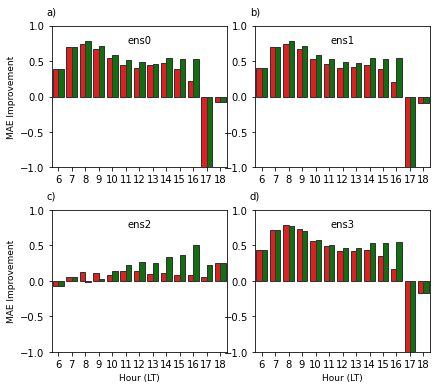

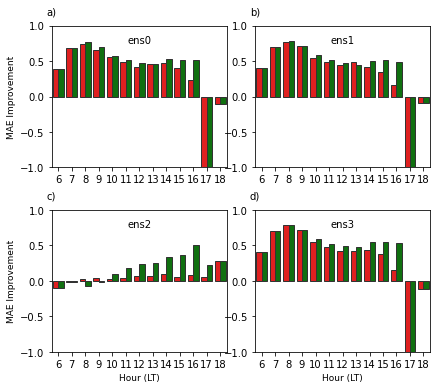

In [5]:
import seaborn as sns
for domain in ['d01', 'd02']:
    a4_dims = (8,6)
    fig = plt.figure(figsize=a4_dims)
    gs = fig.add_gridspec(2, 7,wspace=0.7,hspace=0.3)

    ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
    labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',]

    cols=["red", "green"]
    hue_order = ['improv_mod', 'improv_kf']

    ax = fig.add_subplot(gs[0,0:3])
    data = melted_grby[(melted_grby['ens'] == 'ens0') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('', fontsize=9)
    plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9,'ens0', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[0,3:6])
    data = melted_grby[(melted_grby['ens'] == 'ens1') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('', fontsize=9)
    plt.xlabel('', fontsize=9)
    plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens1', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[1,0:3])
    data = melted_grby[(melted_grby['ens'] == 'ens2') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens2', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[1,3:6])
    data = melted_grby[(melted_grby['ens'] == 'ens3') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens3', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    output_filename = f'{main_dir_path_recursive}/mae_improvement_{domain}.png'
    plt.savefig(output_filename, dpi= 300, bbox_inches="tight")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

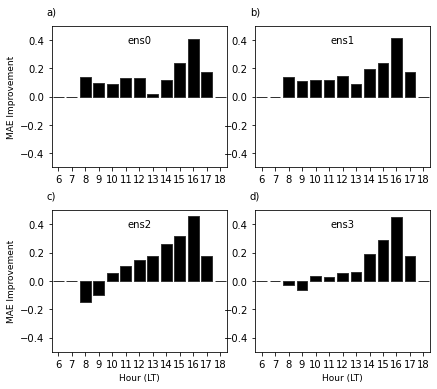

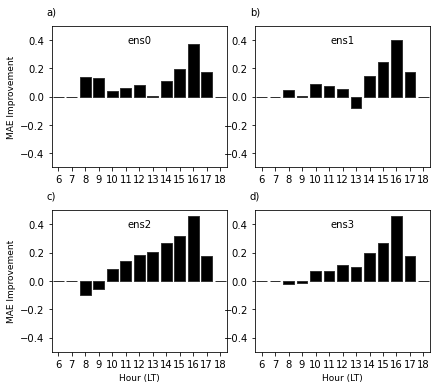

In [6]:
import seaborn as sns
for domain in ['d01', 'd02']:
    a4_dims = (8,6)
    fig = plt.figure(figsize=a4_dims)
    gs = fig.add_gridspec(2, 7,wspace=0.7,hspace=0.3)

    ax = fig.add_subplot(gs[0,0:3])
    data = mae_i[(mae_i['ens'] == 'ens0') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('', fontsize=9)
    plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9,'ens0', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[0,3:6])
    data = mae_i[(mae_i['ens'] == 'ens1') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel('', fontsize=9)
    plt.xlabel('', fontsize=9)
    plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens1', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[1,0:3])
    data = mae_i[(mae_i['ens'] == 'ens2') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens2', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[1,3:6])
    data = mae_i[(mae_i['ens'] == 'ens3') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel('', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens3', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    output_filename = f'{main_dir_path_recursive}/mae_improvement_modkf_{domain}.png'
    plt.savefig(output_filename, dpi= 300, bbox_inches="tight")

In [7]:
d1 = mae_i[mae_i['domain'] == 'd01']
d1 = d1[['HH', 'improv_mod', 'ens']]
d1.columns = ['HH', 'improv_mod_d1', 'ens']
d2 = mae_i[mae_i['domain'] == 'd02']
d2 = d2[['HH', 'improv_mod', 'ens']]
d2.columns = ['HH', 'improv_mod_d2', 'ens']

dom_merge = d1.merge(d2,how='inner',on=['HH', 'ens' ])
dom_merge['improv_domain'] = (dom_merge['improv_mod_d1'] - dom_merge['improv_mod_d2']) / dom_merge['improv_mod_d1']
dom_merge.min()

HH                      6
improv_mod_d1   -2.432934
ens                  ens0
improv_mod_d2   -2.588001
improv_domain   -0.460293
dtype: object

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

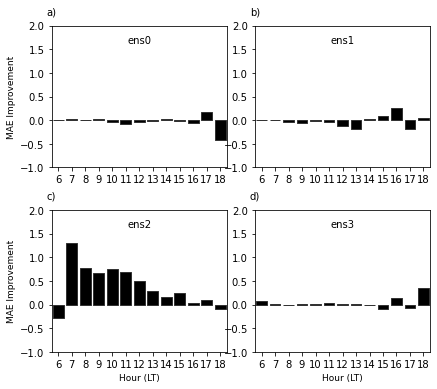

In [8]:
import seaborn as sns

a4_dims = (8,6)
fig = plt.figure(figsize=a4_dims)
gs = fig.add_gridspec(2, 7,wspace=0.7,hspace=0.3)

ax = fig.add_subplot(gs[0,0:3])
data = dom_merge[(dom_merge['ens'] == 'ens0')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('MAE Improvement', fontsize=9)
plt.xlabel('', fontsize=9)
plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9,'ens0', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[0,3:6])
data = dom_merge[(dom_merge['ens'] == 'ens1')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('', fontsize=9)
plt.xlabel('', fontsize=9)
plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens1', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[1,0:3])
data = dom_merge[(dom_merge['ens'] == 'ens2')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('MAE Improvement', fontsize=9)
plt.xlabel('Hour (LT)', fontsize=9)
plt.text(0.,1.1, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens2', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[1,3:6])
data = dom_merge[(dom_merge['ens'] == 'ens3')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('', fontsize=9)
plt.xlabel('Hour (LT)', fontsize=9)
plt.text(0.,1.1, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens3', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
output_filename = f'{main_dir_path_recursive}/mae_improvement_domain.png'
plt.savefig(output_filename, dpi= 300, bbox_inches="tight")

In [9]:
for domain in ['d01', 'd02']:
    ens0 = li[(li['ens'] == 'ens0') & (li['domain'] == domain)]
    ens0['ghi_mod0'] = ens0['ghi_mod']
    ens0 = ens0[['Time','sza', 'flag_clear', 'ghi_obs', 'ghi_mod0']]

    ens1 = li[(li['ens'] == 'ens1') & (li['domain'] == domain)]
    ens1['ghi_mod1'] = ens1['ghi_mod']
    ens1 = ens1[['Time','ghi_mod1']]

    ens2 = li[(li['ens'] == 'ens2')  & (li['domain'] == domain) ]
    ens2['ghi_mod2'] = ens2['ghi_mod']
    ens2 = ens2[['Time','ghi_mod2']]

    x = ens0.merge(ens1,how='inner',on="Time")
    x = ens2.merge(x,how='inner',on="Time")
    x['ghi_mod'] = x[['ghi_mod0', 'ghi_mod1', 'ghi_mod2']].mean(axis=1)
    if domain == 'd01':
        x5_li = x
        x5_li['rmse_mod'] = fitting(x)[7]
        x5_li['r_mod'] = fitting(x)[0]
    if domain == 'd02':
        x1_li = x
        x1_li['rmse_mod'] = fitting(x)[7]
        x1_li['r_mod'] = fitting(x)[0]
        
    x['dw_solar'] = x['ghi_obs']
    x['G_nam'] = x['ghi_mod']
    x['zen'] = x['sza']
    x = x[['Time', 'zen', 'dw_solar', 'G_nam']]
    
    
    
    x.to_csv(f'{main_dir_path_recursive}/oldensmean_{domain}_model.csv')

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/2133110398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ens0['ghi_mod0'] = ens0['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/2133110398.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ens1['ghi_mod1'] = ens1['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/2133110398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [10]:
r_input = li[['Time', 'sza', 'ghi_obs', 'ghi_mod', 'GHI_pred_kf_only', 'GHI_pred_improved_fin', 'ens', 'domain', 'flag_clear']]
for ens in ['ens0','ens1','ens2','ens3','ensmean']:
    for domain in ['d01', 'd02']:
        x = r_input[(r_input['ens'] == ens) & (r_input['domain'] == domain)]
        x['dw_solar'] = x['ghi_obs']
        x['G_nam'] = x['ghi_mod']
        x['zen'] = x['sza']
        x = x[['Time', 'zen', 'dw_solar', 'G_nam']]
        x.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_model.csv')
        
        x = r_input[(r_input['ens'] == ens) & (r_input['domain'] == domain)]
        x['dw_solar'] = x['ghi_obs']
        x['G_nam'] = x['GHI_pred_kf_only']
        x['zen'] = x['sza']
        x = x[['Time', 'zen', 'dw_solar', 'G_nam']]
        x.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_kf.csv')
        
        x = r_input[(r_input['ens'] == ens) & (r_input['domain'] == domain)]
        x['dw_solar'] = x['ghi_obs']
        x['G_nam'] = x['GHI_pred_improved_fin']
        x['zen'] = x['sza']
        x = x[['Time', 'zen', 'dw_solar', 'G_nam']]
        x.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_kfp.csv')
    

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/1771903513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['dw_solar'] = x['ghi_obs']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/1771903513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['G_nam'] = x['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/1771903513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [11]:
li.columns

Index(['Unnamed: 0', 'Time', 'CMP22_Total_Solar', 'SPN1_Total_Solar',
       'SPN1_Diff_Solar', 'CGR4_IR', 'dhi', 'ghi_a', 'sza', 'cossza', 'dni',
       'MM', 'DD', 'HH', 'mm', 'GHI_in', 'DNI_in', 'DHI_in', 'cossza_b',
       'SPN1_Total_Solar_N', 't2_lim', 'cossza_noon', 'FT_t', 'FT_TOA',
       'FT_TOA_t', 't3_llim', 't3_ulim', 'Diffuse_Ratio', 'SPN1_Diff_Solar_N',
       'sigma', 'ghi_cc_val', 'dhi_cc_val', 't1_lim', 'flag_clear', 'ghi_obs',
       'ens', 'domain', 'station_name', 'ghi_mod', 'YY', 'Error_rel',
       'Kc_GHI_pred', 'Kc_GHI_obs', 'Kc_obs_bias', 'LT', 'GHI_pred_kf_only',
       'GHI_pred_improved_fin', 'rmse_mod', 'r_mod', 'kfp_rmse', 'kfp_r',
       'kf_rmse', 'kf_r'],
      dtype='object')

In [12]:
r_input = li[['Time', 'sza', 'ghi_obs', 'ghi_mod', 'GHI_pred_kf_only', 'GHI_pred_improved_fin', 'ens', 'domain', 'flag_clear']]
for ens in ['ens0','ens1','ens2','ens3','ensmean']:
    for domain in ['d01', 'd02']:
        x = r_input[(r_input['ens'] == ens) & (r_input['domain'] == domain)]
        x['dw_solar'] = x['ghi_obs']
        x['G_nam'] = x['ghi_mod']
        x['zen'] = x['sza']
        x = x[['Time', 'zen', 'dw_solar', 'G_nam']]
        x.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_model.csv')
        
        x = r_input[(r_input['ens'] == ens) & (r_input['domain'] == domain)]
        x['dw_solar'] = x['ghi_obs']
        x['G_nam'] = x['GHI_pred_kf_only']
        x['zen'] = x['sza']
        x = x[['Time', 'zen', 'dw_solar', 'G_nam']]
        x.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_kf.csv')
        
        x = r_input[(r_input['ens'] == ens) & (r_input['domain'] == domain)]
        x['dw_solar'] = x['ghi_obs']
        x['G_nam'] = x['GHI_pred_improved_fin']
        x['zen'] = x['sza']
        x = x[['Time', 'zen', 'dw_solar', 'G_nam']]
        x.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_kfp.csv')

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/2309137675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['dw_solar'] = x['ghi_obs']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/2309137675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['G_nam'] = x['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/2309137675.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/1893360474.py:79: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{main_dir_path_recursive}/models_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


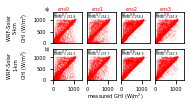

In [13]:
#row 1: ghi_mod

def scat_model(da_mean,x5_li,x1_li):   
    
    
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    

    jump = 1    
    i_end = 2 
    j_end = 4 
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]
            
            if (i == 0) & (j!=4): 
                color_= 'red'
                back = back[back['domain'] == 'd01']
                method = 'WRF-Solar \n5-km'
            
            if (i == 1) & (j!=4):     
                color_= 'red'
                back = back[back['domain'] == 'd02']
                method = 'WRF-Solar \n1-km'
                

            rmse = back['rmse_mod'].mean()
            r_ = back['r_mod'].mean()
                
            ax.scatter(x=back['ghi_obs'],y=back['ghi_mod'],c=color_,s=0.01,alpha=0.3)
            plt.plot(x_new,x_new,c='gray',linewidth=0.1)
            ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
            ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

            ax.tick_params(axis='both', which='major', labelsize=5)
            ax.set_ylim(0,1360)
            ax.set_xlim(0,1360)

            if (j==0):
                ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

            if ((i==0) & (j==0)):
                ax.text( -400, 1400,'a)', fontsize=5, color='k')
            if ((i==1) & (j==0)):
                ax.text( -400, 1300,'b)', fontsize=5, color='k')

            if (i==0):
                ax.text( 200, 1400,ens, fontsize=5, color=color_)
            if ((i==1) & (j==1)):
                ax.text( 0, -800,f'measured GHI (W/m$^2$)', fontsize=5, color='k')


    plt.savefig(f"{main_dir_path_recursive}/models_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")

scat_model(li,x5_li,x1_li)


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/1079925464.py:82: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{main_dir_path_recursive}/models_cloudy_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


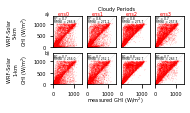

In [14]:
#row 1: ghi_mod

def scat_model_cloudy(da_mean,x5_li,x1_li):  
    
    da_mean = da_mean[da_mean['flag_clear'] == 'N']
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    

    jump = 1  
    i_end = 2 
    j_end = 4 
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]

            
            if (i == 0) & (j!=4): 
                color_= 'red'
                back = back[back['domain'] == 'd01']
                method = 'WRF-Solar \n5-km'
            
            if (i == 1) & (j!=4):     
                color_= 'red'
                back = back[back['domain'] == 'd02']
                method = 'WRF-Solar \n1-km'
                
                
            rmse = fitting(back)[7]
            r_ =  fitting(back)[0]
                
            ax.scatter(x=back['ghi_obs'],y=back['ghi_mod'],c=color_,s=0.01,alpha=0.3)
            plt.plot(x_new,x_new,c='gray',linewidth=0.1)
            ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
            ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

            ax.tick_params(axis='both', which='major', labelsize=5)
            ax.set_ylim(0,1360)
            ax.set_xlim(0,1360)

            if (j==0):
                ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  
                
            if ((i==0) & (j==0)):
                ax.text( -400, 1400,'a)', fontsize=5, color='k')
            if ((i==1) & (j==0)):
                ax.text( -400, 1300,'b)', fontsize=5, color='k')
                
            if (i==0):
                ax.text( 200, 1400,ens, fontsize=5, color=color_)
            if ((i==0) & (j==1)):
                ax.text( 500, 1600,'Cloudy Periods', fontsize=5, color='k')
            if ((i==1) & (j==1)):
                ax.text( 0, -800,f'measured GHI (W/m$^2$)', fontsize=5, color='k')


    plt.savefig(f"{main_dir_path_recursive}/models_cloudy_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")

scat_model_cloudy(li,x5_li,x1_li)


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/3003604932.py:83: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{main_dir_path_recursive}/models_clear_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


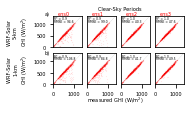

In [15]:
#row 1: ghi_mod

def scat_model_clear(da_mean):   
    
    da_mean = da_mean[da_mean['flag_clear'] == 'Y']
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    

    jump = 1  
    i_end = 2 
    j_end = 4
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]
            
            if (i == 0): 
                color_= 'red'
                back = back[back['domain'] == 'd01']
                method = 'WRF-Solar \n5-km'
            
            if (i == 1):     
                color_= 'red'
                back = back[back['domain'] == 'd02']
                method = 'WRF-Solar \n1-km'
                

            rmse = fitting(back)[7]
            r_ =  fitting(back)[0]
            
            ax.scatter(x=back['ghi_obs'],y=back['ghi_mod'],c=color_,s=0.01,alpha=0.3)
            plt.plot(x_new,x_new,c='gray',linewidth=0.1)
            ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
            ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

            ax.tick_params(axis='both', which='major', labelsize=5)
            ax.set_ylim(0,1360)
            ax.set_xlim(0,1360)


            if (j==0):
                ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

            if (i==0):
                ax.text( 200, 1400,ens, fontsize=5, color=color_)
                
            if ((i==0) & (j==0)):
                ax.text( -400, 1400,'a)', fontsize=5, color='k')
            if ((i==1) & (j==0)):
                ax.text( -400, 1300,'b)', fontsize=5, color='k')
            
            if ((i==0) & (j==1)):
                ax.text( 500, 1600,'Clear-Sky Periods', fontsize=5, color='k')
            if ((i==1) & (j==1)):
                ax.text( 0, -800,f'measured GHI (W/m$^2$)', fontsize=5, color='k')


    plt.savefig(f"{main_dir_path_recursive}/models_clear_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")

scat_model_clear(li)


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/456924143.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  back['pl'] = back['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/456924143.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  back['pl'] = back['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/456924143.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

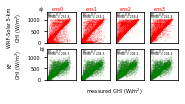

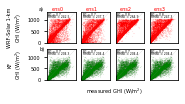

In [16]:
#row 1: ghi_mod

#row 2: 'GHI_pred_kf_only'

#row 3: 'GHI_pred_improved_fin'

def scat_all(domain, da_mean):   
    plt_da = da_mean
    
    li_gr = da_mean[da_mean['domain'] == str(domain)]
    li_gr = li_gr.groupby(['Time']).agg({'GHI_pred_kf_only':'mean','ghi_obs':'mean'}).reset_index()
    li_gr['kf_rmse'] = kf_fitting_pred(li_gr)[7]
    li_gr['kf_r'] = kf_fitting_pred(li_gr)[0]

    li_gr2 = da_mean[da_mean['domain'] == str(domain)]
    li_gr2 = li_gr2.groupby(['Time']).agg({'GHI_pred_improved_fin':'mean','ghi_obs':'mean'}).reset_index()
    li_gr2['kfp_rmse'] = fitting_pred(li_gr2)[7]
    li_gr2['kfp_r'] = fitting_pred(li_gr2)[0]
    
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    da_mean = da_mean[da_mean['domain'] == str(domain)]
    if domain == 'd01':
            res = 5
    elif domain == 'd02':
            res = 1
    jump = 1
    i_end = 2
    j_end = 4
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0) | (i == 1)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):#2):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):#4):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):#6):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]
            
            if ((i == 0) & (j != 5)):
                method = f'WRF-Solar {res}-km'
                color_= 'red'
                back['pl'] = back['ghi_mod']
                rmse = back['rmse_mod'].mean()
                r_ = back['r_mod'].mean()
            if (i == 1):#2):
                method = 'KF'
                color_= 'green'
                back['pl'] = back['GHI_pred_kf_only']   
                rmse = back['kf_rmse'].mean()
                r_ = back['kf_r'].mean()

            
            if (((i == 0) & (j != 5)) | ((i != 0) & (j <= 5))):
                
                ax.scatter(x=back['ghi_obs'],y=back['pl'],c=color_,s=0.01,alpha=0.3)
                plt.plot(x_new,x_new,c='gray',linewidth=0.1)
                ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
                ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

                ax.tick_params(axis='both', which='major', labelsize=5)
                ax.set_ylim(0,1360)
                ax.set_xlim(0,1360)

                if (j==0):
                    ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

                if (i==0) | ((i!=0 ) & (j==5)):
                    ax.text( 200, 1400,ens, fontsize=5, color=color_)
                if ((i==1) & (j==1)):
                    ax.text( 200, -600,f'measured GHI (W/m$^2$)', fontsize=5, color='k')
                if ((i==0) & (j==0)):
                    ax.text( -400, 1400,'a)', fontsize=5, color='k')
                if ((i==1) & (j==0)):
                    ax.text( -400, 1300,'b)', fontsize=5, color='k')
                if ((i==2) & (j==0)):
                    ax.text( -400, 1300,'c)', fontsize=5, color='k')

    plt.savefig(f"{main_dir_path_recursive}/all_Manila_scatplot_{res}km_{domain}_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")

scat_all('d01',li)
scat_all('d02',li)


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/3675885714.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  back['pl'] = back['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/3675885714.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  back['pl'] = back['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/3675885714.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

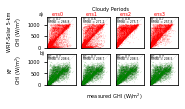

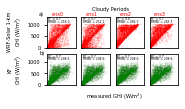

In [17]:
#row 1: ghi_mod

#row 2: 'GHI_pred_kf_only'

#row 3: 'GHI_pred_improved_fin'

def scat_cloudy(domain, da_mean):   
    da_mean = da_mean[da_mean['flag_clear'] == 'N']
    
    li_gr = da_mean[da_mean['domain'] == str(domain)]
    li_gr = li_gr.groupby(['Time']).agg({'GHI_pred_kf_only':'mean','ghi_obs':'mean'}).reset_index()
    li_gr['kf_rmse'] = kf_fitting_pred(li_gr)[7]
    li_gr['kf_r'] = kf_fitting_pred(li_gr)[0]

    li_gr2 = da_mean[da_mean['domain'] == str(domain)]
    li_gr2 = li_gr2.groupby(['Time']).agg({'GHI_pred_improved_fin':'mean','ghi_obs':'mean'}).reset_index()
    li_gr2['kfp_rmse'] = fitting_pred(li_gr2)[7]
    li_gr2['kfp_r'] = fitting_pred(li_gr2)[0]
    
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    da_mean = da_mean[da_mean['domain'] == str(domain)]
    if domain == 'd01':
            res = 5
    elif domain == 'd02':
            res = 1
    jump = 1 
    i_end = 2
    j_end = 4
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0) | (i == 1)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):#2):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):#4):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):#6):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]

            if ((i == 0) & (j != 5)):
                method = f'WRF-Solar {res}-km'
                color_= 'red'
                back['pl'] = back['ghi_mod']
                rmse = fitting(back)[7]
                r_ = fitting(back)[0]
            if (i == 1):#2):
                method = 'KF'
                color_= 'green'
                back['pl'] = back['GHI_pred_kf_only']   
                rmse = kf_fitting_pred(back)[7]
                r_ = kf_fitting_pred(back)[0]

            if (((i == 0) & (j != 5)) | ((i != 0) & (j <= 5))):
                
                ax.scatter(x=back['ghi_obs'],y=back['pl'],c=color_,s=0.01,alpha=0.3)
                plt.plot(x_new,x_new,c='gray',linewidth=0.1)
                ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
                ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

                ax.tick_params(axis='both', which='major', labelsize=5)
                ax.set_ylim(0,1360)
                ax.set_xlim(0,1360)

                if (j==0):
                    ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

                if (i==0) | ((i!=0 ) & (j==5)):
                    ax.text( 200, 1400,ens, fontsize=5, color=color_)
                if ((i==1) & (j==1)):
                    ax.text( 200, -600,f'measured GHI (W/m$^2$)', fontsize=5, color='k')
                if ((i==0) & (j==0)):
                    ax.text( -400, 1400,'a)', fontsize=5, color='k')
                if ((i==1) & (j==0)):
                    ax.text( -400, 1300,'b)', fontsize=5, color='k')
                if ((i==2) & (j==0)):
                    ax.text( -400, 1300,'c)', fontsize=5, color='k')
                    
                if ((i==0) & (j==1)):
                    ax.text( 500, 1600,'Cloudy Periods', fontsize=5, color='k')

    plt.savefig(f"{main_dir_path_recursive}/all_cloudy_Manila_scatplot_{res}km_{domain}_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")

scat_cloudy('d01',li)
scat_cloudy('d02',li)


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/3785520093.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  back['pl'] = back['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/3785520093.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  back['pl'] = back['ghi_mod']
/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1146/3785520093.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

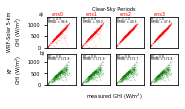

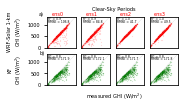

In [18]:
#row 1: ghi_mod

#row 2: 'GHI_pred_kf_only'

#row 3: 'GHI_pred_improved_fin'

def scat_clear(domain, da_mean):   
    da_mean = da_mean[da_mean['flag_clear'] == 'Y']
    
    li_gr = da_mean[da_mean['domain'] == str(domain)]
    li_gr = li_gr.groupby(['Time']).agg({'GHI_pred_kf_only':'mean','ghi_obs':'mean'}).reset_index()
    li_gr['kf_rmse'] = kf_fitting_pred(li_gr)[7]
    li_gr['kf_r'] = kf_fitting_pred(li_gr)[0]

    li_gr2 = da_mean[da_mean['domain'] == str(domain)]
    li_gr2 = li_gr2.groupby(['Time']).agg({'GHI_pred_improved_fin':'mean','ghi_obs':'mean'}).reset_index()
    li_gr2['kfp_rmse'] = fitting_pred(li_gr2)[7]
    li_gr2['kfp_r'] = fitting_pred(li_gr2)[0]
    
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    da_mean = da_mean[da_mean['domain'] == str(domain)]
    if domain == 'd01':
            res = 5
    elif domain == 'd02':
            res = 1
    jump = 1 
    i_end = 2 
    j_end = 4
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0) | (i == 1)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):#2):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):#4):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):#6):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]
            if ((i == 0) & (j != 5)):
                method = f'WRF-Solar {res}-km'
                color_= 'red'
                back['pl'] = back['ghi_mod']
                rmse = fitting(back)[7]
                r_ = fitting(back)[0]
            if (i == 1):#2):
                method = 'KF'
                color_= 'green'
                back['pl'] = back['GHI_pred_kf_only']   
                rmse = kf_fitting_pred(back)[7]
                r_ = kf_fitting_pred(back)[0]
            
            if (((i == 0) & (j != 5)) | ((i != 0) & (j <= 5))):
                
                
                ax.scatter(x=back['ghi_obs'],y=back['pl'],c=color_,s=0.01,alpha=0.5)
                plt.plot(x_new,x_new,c='gray',linewidth=0.1)
                ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
                ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

                ax.tick_params(axis='both', which='major', labelsize=5)
                ax.set_ylim(0,1360)
                ax.set_xlim(0,1360)

                if (j==0):
                    ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

                if (i==0) | ((i!=0 ) & (j==5)):
                    ax.text( 200, 1400,ens, fontsize=5, color=color_)
                if ((i==1) & (j==1)):
                    ax.text( 200, -600,f'measured GHI (W/m$^2$)', fontsize=5, color='k')
                if ((i==0) & (j==0)):
                    ax.text( -400, 1400,'a)', fontsize=5, color='k')
                if ((i==1) & (j==0)):
                    ax.text( -400, 1300,'b)', fontsize=5, color='k')
                if ((i==2) & (j==0)):
                    ax.text( -400, 1300,'c)', fontsize=5, color='k')
                if ((i==0) & (j==1)):
                    ax.text( 500, 1600,'Clear-Sky Periods', fontsize=5, color='k')

    plt.savefig(f"{main_dir_path_recursive}/all_clear_Manila_scatplot_{res}km_{domain}_{nb_historical_days}_updated.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")

scat_clear('d01',li)
scat_clear('d02',li)
